In [1]:
#importing the required libraries 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

In [2]:
# Importing dataset and examining it

dataset = pd.read_csv("Term_Deposit_Data.csv")
pd.set_option('display.max_columns', None) # to make sure you can see all the columns in output window
print(dataset.head())

     Id    age           job  marital  education default  balance housing  \
0  1001  999.0    management  married   tertiary      no   2143.0     yes   
1  1002   44.0    technician   single  secondary      no     29.0     yes   
2  1003   33.0  entrepreneur  married  secondary      no      2.0     yes   
3  1004   47.0   blue-collar  married    unknown      no   1506.0     yes   
4  1005   33.0       unknown   single    unknown      no      1.0      no   

  loan  contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  unknown    5   may       261         1     -1         0  unknown  no  
1   no  unknown    5   may       151         1     -1         0  unknown  no  
2  yes  unknown    5   may        76         1     -1         0  unknown  no  
3   no  unknown    5   may        92         1     -1         0  unknown  no  
4   no  unknown    5   may       198         1     -1         0  unknown  no  


In [3]:
dataset.drop(['Id'], axis = 1, inplace=True)

In [4]:
#Renaming dependent variable

dataset=dataset.rename(columns = {'y':'subscribed'})
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Section 1: Data Exploration and Preparation

In [5]:
#Printing the dimentions of the data

print(dataset.shape)

(45211, 17)


In [6]:
#Printing information of the data

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         45202 non-null  float64
 1   job         45211 non-null  object 
 2   marital     45211 non-null  object 
 3   education   45211 non-null  object 
 4   default     45211 non-null  object 
 5   balance     45208 non-null  float64
 6   housing     45211 non-null  object 
 7   loan        45211 non-null  object 
 8   contact     45211 non-null  object 
 9   day         45211 non-null  int64  
 10  month       45211 non-null  object 
 11  duration    45211 non-null  int64  
 12  campaign    45211 non-null  int64  
 13  pdays       45211 non-null  int64  
 14  previous    45211 non-null  int64  
 15  poutcome    45211 non-null  object 
 16  subscribed  45211 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.9+ MB
None


In [7]:
#Printing data desriptions

print(dataset.describe())

                age        balance           day      duration      campaign  \
count  45202.000000   45208.000000  45211.000000  45211.000000  45211.000000   
mean      40.954714    1362.346620     15.806419    258.163080      2.763841   
std       11.539144    3044.852387      8.322476    257.527812      3.098021   
min       -1.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max      999.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [8]:
# Removing outliers from 'age' and 'previous' column

dataset.drop(dataset[(dataset['age']==-1) | (dataset['age']==999)].index, inplace=True)
dataset.drop(dataset[(dataset['previous']==275)].index, inplace=True)
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45197.000000,45203.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000
mean,40.936323,1362.361171,15.806884,258.157081,2.763992,40.195660,0.574127
std,10.617963,3044.999752,8.322522,257.540920,3.098155,100.128287,1.907686
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


In [9]:
#Lets calculate the missing values for each column

dataset.isnull().sum()

age           9
job           0
marital       0
education     0
default       0
balance       3
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [10]:
#Replacing the missing values by mean and rounding off till 2 digits

age_mean=round(dataset['age'].mean(),2)
balance_mean=round(dataset['balance'].mean(),2)

dataset['age'].replace(np.nan, age_mean, inplace=True)
dataset['balance'].replace(np.nan, balance_mean, inplace=True)

In [11]:
#Again checking for the missing values

dataset.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
# Converting Categorical features into Numerical features

def converter(column):
    if column == 'yes':
        return 1
    else:
        return 0

In [13]:
#Applying the function to convert Categorical features into Numerical features

dataset['default'] = dataset['default'].apply(converter)
dataset['housing'] = dataset['housing'].apply(converter)
dataset['loan'] = dataset['loan'].apply(converter)
dataset['subscribed'] = dataset['subscribed'].apply(converter)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45206 entries, 1 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         45206 non-null  float64
 1   job         45206 non-null  object 
 2   marital     45206 non-null  object 
 3   education   45206 non-null  object 
 4   default     45206 non-null  int64  
 5   balance     45206 non-null  float64
 6   housing     45206 non-null  int64  
 7   loan        45206 non-null  int64  
 8   contact     45206 non-null  object 
 9   day         45206 non-null  int64  
 10  month       45206 non-null  object 
 11  duration    45206 non-null  int64  
 12  campaign    45206 non-null  int64  
 13  pdays       45206 non-null  int64  
 14  previous    45206 non-null  int64  
 15  poutcome    45206 non-null  object 
 16  subscribed  45206 non-null  int64  
dtypes: float64(2), int64(9), object(6)
memory usage: 6.2+ MB
None


In [14]:
#Converting Categorical features into dummy matrix

categorical_features = ['job','marital','education','contact','month','poutcome'] #
final_data = pd.get_dummies(dataset, columns = categorical_features)
print(final_data.info())
print(final_data.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45206 entries, 1 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45206 non-null  float64
 1   default              45206 non-null  int64  
 2   balance              45206 non-null  float64
 3   housing              45206 non-null  int64  
 4   loan                 45206 non-null  int64  
 5   day                  45206 non-null  int64  
 6   duration             45206 non-null  int64  
 7   campaign             45206 non-null  int64  
 8   pdays                45206 non-null  int64  
 9   previous             45206 non-null  int64  
 10  subscribed           45206 non-null  int64  
 11  job_admin.           45206 non-null  uint8  
 12  job_blue-collar      45206 non-null  uint8  
 13  job_entrepreneur     45206 non-null  uint8  
 14  job_housemaid        45206 non-null  uint8  
 15  job_management       45206 non-null 

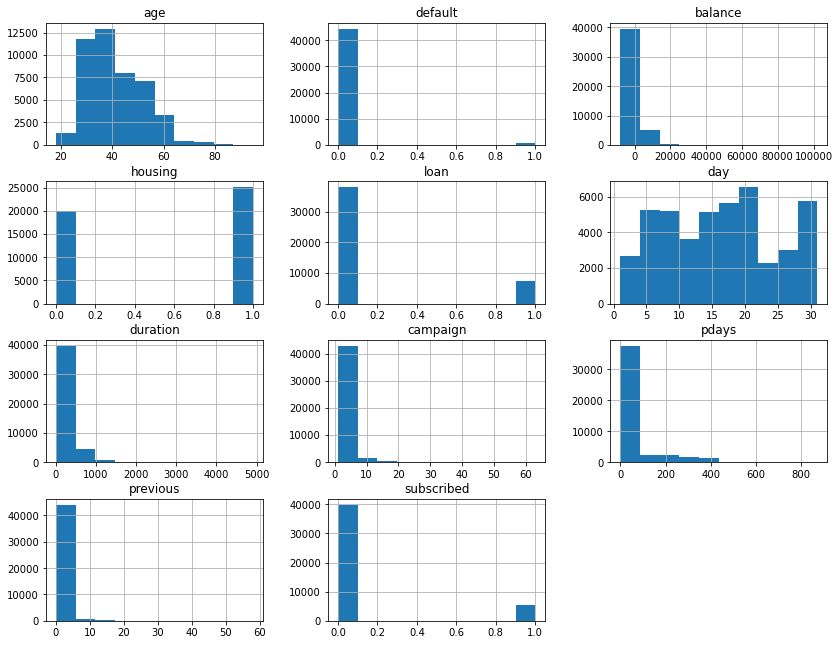

In [15]:
# Plotting histogram to check the data distribution

dataset.hist(figsize=(14,11))
plt.show()

In [16]:
# Printing the final data

print(final_data.shape)
print(final_data.info())
print(final_data.describe())

(45206, 49)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45206 entries, 1 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45206 non-null  float64
 1   default              45206 non-null  int64  
 2   balance              45206 non-null  float64
 3   housing              45206 non-null  int64  
 4   loan                 45206 non-null  int64  
 5   day                  45206 non-null  int64  
 6   duration             45206 non-null  int64  
 7   campaign             45206 non-null  int64  
 8   pdays                45206 non-null  int64  
 9   previous             45206 non-null  int64  
 10  subscribed           45206 non-null  int64  
 11  job_admin.           45206 non-null  uint8  
 12  job_blue-collar      45206 non-null  uint8  
 13  job_entrepreneur     45206 non-null  uint8  
 14  job_housemaid        45206 non-null  uint8  
 15  job_management       452